In [26]:
import numpy as np
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
(X_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
unique, counts = np.unique(y_train, return_counts = True)
print("Train Labels", dict(zip(unique, counts)))

Train Labels {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [8]:
unique, counts = np.unique(y_test, return_counts = True)
print("Test Labels", dict(zip(unique, counts)))

Test Labels {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


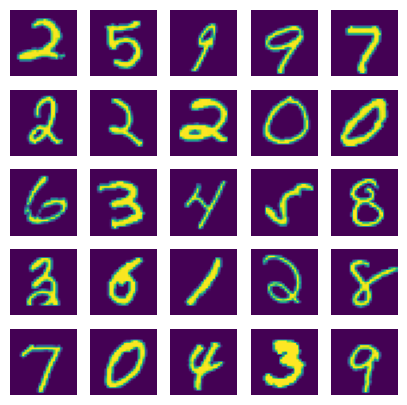

In [12]:
indexes = np.random.randint(0, X_train.shape[0], size = 25)
images = X_train[indexes]
labels = y_train[indexes]

plt.figure(figsize = (5, 5))
for i in range(len(indexes)):
  plt.subplot(5, 5, i+1)
  image = images[i]
  plt.imshow(image)
  plt.axis("off")

plt.show()
plt.close('all')

In [13]:
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [19]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

input_size = X_train.shape[1] * X_train.shape[2]
x_train = np.reshape(X_train, [-1, input_size])
x_train = x_train.astype("float32") / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype("float32") /255

In [20]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

### MLP Model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               200960    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


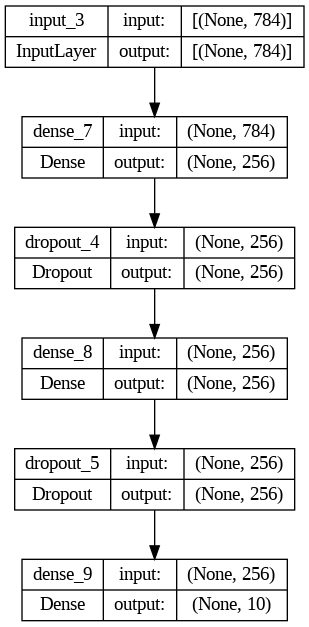

In [34]:
from keras import layers
from keras.models import Sequential
batch_size = 128
hidden_units = 256
dropout = 0.45

model = Sequential()
model.add(layers.Input(shape = (input_size)))
model.add(layers.Dense(hidden_units, activation = "relu"))
model.add(layers.Dropout(dropout))
model.add(layers.Dense(hidden_units, activation = "relu"))
model.add(layers.Dropout(dropout))
model.add(layers.Dense(num_labels, activation = "softmax"))
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [25]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.fit(x_train, y_train, batch_size = batch_size, epochs = 20, validation_split = 0.1)
_, acc = model.evaluate(x_test, y_test, batch_size = batch_size, verbose = 1)

Epoch 1/20
422/422 [==============================] - 5s 10ms/step - loss: 0.4476 - accuracy: 0.8623 - val_loss: 0.1279 - val_accuracy: 0.9617
Epoch 2/20
422/422 [==============================] - 6s 13ms/step - loss: 0.2061 - accuracy: 0.9385 - val_loss: 0.0908 - val_accuracy: 0.9732
Epoch 3/20
422/422 [==============================] - 4s 9ms/step - loss: 0.1620 - accuracy: 0.9514 - val_loss: 0.0767 - val_accuracy: 0.9778
Epoch 4/20
422/422 [==============================] - 4s 9ms/step - loss: 0.1358 - accuracy: 0.9591 - val_loss: 0.0730 - val_accuracy: 0.9790
Epoch 5/20
422/422 [==============================] - 7s 16ms/step - loss: 0.1209 - accuracy: 0.9628 - val_loss: 0.0692 - val_accuracy: 0.9790
Epoch 6/20
422/422 [==============================] - 4s 10ms/step - loss: 0.1093 - accuracy: 0.9652 - val_loss: 0.0652 - val_accuracy: 0.9803
Epoch 7/20
422/422 [==============================] - 4s 9ms/step - loss: 0.0987 - accuracy: 0.9687 - val_loss: 0.0639 - val_accuracy: 0.9797
Ep

In [33]:
print(f"Test accuracy: {acc * 100:.2f}%")

Test accuracy: 98.23%


### CNN Model

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)               0       

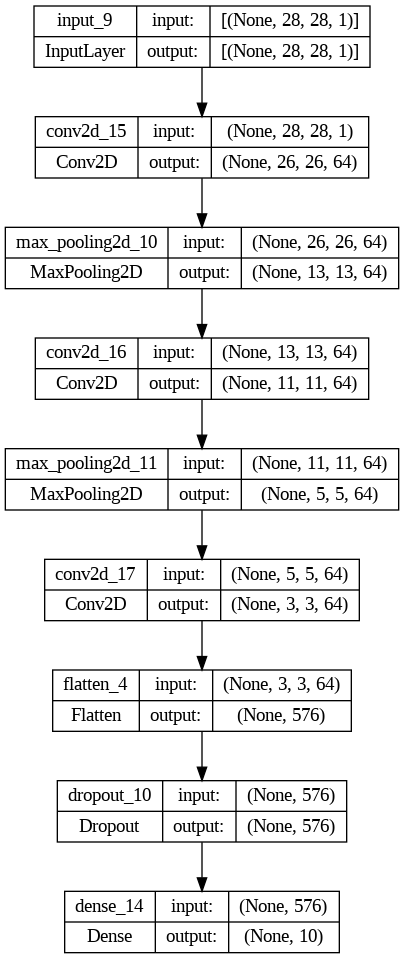

In [50]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_labels = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_test = x_test.astype('float32') / 255

shape = (image_size, image_size, 1)

model = Sequential(name = "CNN")
model.add(layers.Input(shape = (shape)))
model.add(layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_labels, activation = "softmax"))
model.summary()
keras.utils.plot_model(model, show_shapes = True)

In [51]:
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ["accuracy"])
model.fit(x_train, y_train, epochs = 10, batch_size = batch_size, validation_split = 0.1)
_, acc = model.evaluate(x_test, y_test, batch_size = batch_size, verbose = 1)
print(f"\nTest Accuracy {acc * 100:.2f}%")

Epoch 1/10
422/422 [==============================] - 74s 172ms/step - loss: 0.2961 - accuracy: 0.9123 - val_loss: 0.0649 - val_accuracy: 0.9815
Epoch 2/10
422/422 [==============================] - 72s 170ms/step - loss: 0.0745 - accuracy: 0.9770 - val_loss: 0.0460 - val_accuracy: 0.9870
Epoch 3/10
422/422 [==============================] - 71s 169ms/step - loss: 0.0512 - accuracy: 0.9844 - val_loss: 0.0363 - val_accuracy: 0.9900
Epoch 4/10
422/422 [==============================] - 72s 171ms/step - loss: 0.0399 - accuracy: 0.9869 - val_loss: 0.0335 - val_accuracy: 0.9898
Epoch 5/10
422/422 [==============================] - 73s 172ms/step - loss: 0.0335 - accuracy: 0.9897 - val_loss: 0.0370 - val_accuracy: 0.9897
Epoch 6/10
422/422 [==============================] - 71s 168ms/step - loss: 0.0295 - accuracy: 0.9903 - val_loss: 0.0342 - val_accuracy: 0.9905
Epoch 7/10
422/422 [==============================] - 71s 168ms/step - loss: 0.0263 - accuracy: 0.9914 - val_loss: 0.0307 - val_ac